# Analysis of FIFA 20 Data using Regression Models

In this notebook we will clean FIFA 20 data and prepare it for predictive modelling and build various regression models to predict the price for any player above €5,000,000.


## Overview of Data

The dataset contains data about football players from FIFA 20. Each row is a summary of a player's stats with a row for each player. Among the stats you can find age, height, nationality, overall rating and more. The dataset covers 18277 players with 104 different columns relating to their attributes. This dataset was downloaded from Kaggle.

## Cleaning the Data

First we import the necessary libraries:

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\samke\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


We then set the option to view all columns and rows of a dataset and save the data as a DataFrame named 'df':

In [21]:
pd.set_option('max_columns', None) #View all columns in dataset
df = pd.read_csv('players_20.csv') 

In [22]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

We then reduce the dataframe to only include columns that we feel may be useful for predicting a player's value:

In [23]:
df = df[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'overall', 'potential', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'value_eur']]
df.head()

,short_name,age,height_cm,weight_kg,nationality,overall,potential,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,value_eur
0,L. Messi,32,170,72,Argentina,94,94,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,95500000
1,Cristiano Ronaldo,34,187,83,Portugal,93,93,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,58500000
2,Neymar Jr,27,175,68,Brazil,92,92,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,105500000
3,J. Oblak,26,188,87,Slovenia,91,93,3,1,Medium/Medium,GK,NaN,NaN,NaN,NaN,NaN,NaN,77500000
4,E. Hazard,28,175,74,Belgium,91,91,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,90000000


We can see from the below boxplot and histogram that the data for player value is heavily skewed to the right:

{'whiskers': [<matplotlib.lines.Line2D at 0x229c73c0820>,
 'caps': [<matplotlib.lines.Line2D at 0x229c73c0ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c73c04c0>],
 'medians': [<matplotlib.lines.Line2D at 0x229c73ce5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c73ce940>],
 'means': []}

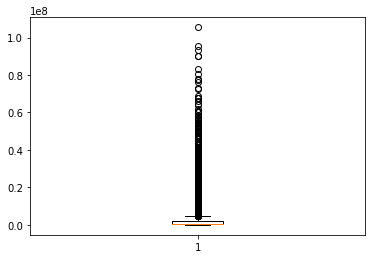

In [24]:
plt.boxplot(df['value_eur'])

<AxesSubplot:>

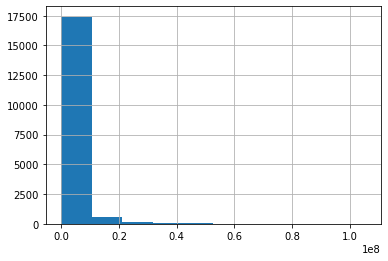

In [25]:
df.value_eur.hist()

The vast majority of the players on FIFA fall within a very small price range, therefore the full data was heavily skewed to the right. Given that it would likely be of more use to predict the price of the higher valued players, we will only focus on players whose value was over €5,000,000. Therefore this model will only be useful at predicting the value of higher quality players.

In [26]:
df = df[df['value_eur']>5000000]

<AxesSubplot:>

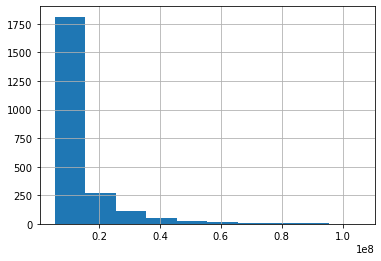

In [27]:
df['value_eur'].hist()

In [28]:
df.shape

(2304, 18)

{'whiskers': [<matplotlib.lines.Line2D at 0x229c750f970>,
 'caps': [<matplotlib.lines.Line2D at 0x229c751c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c750f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x229c751c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c751cac0>],
 'means': []}

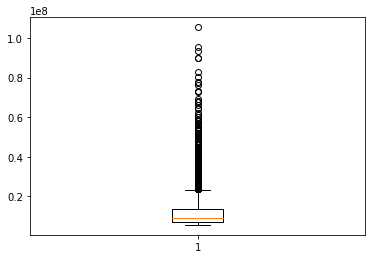

In [29]:
plt.boxplot(df.value_eur)

We will also exclude goalkeepers from the dataset given the different stats required for this position. Therefore, this model will only predict the value of outfield players.

In [30]:
df2 = df.copy()
df2 = df2[df2['team_position'] != 'GK'] 
df2.head()

,short_name,age,height_cm,weight_kg,nationality,overall,potential,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,value_eur
0,L. Messi,32,170,72,Argentina,94,94,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,95500000
1,Cristiano Ronaldo,34,187,83,Portugal,93,93,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,58500000
2,Neymar Jr,27,175,68,Brazil,92,92,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,105500000
4,E. Hazard,28,175,74,Belgium,91,91,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,90000000
5,K. De Bruyne,28,181,70,Belgium,91,91,5,4,High/High,RCM,76.0,86.0,92.0,86.0,61.0,78.0,90000000


In [31]:
df2 = df2.set_index('short_name')
df2.head()

,age,height_cm,weight_kg,nationality,overall,potential,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,value_eur
short_name,,,,,,,,,,,,,,,,,
L. Messi,32,170,72,Argentina,94,94,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,95500000
Cristiano Ronaldo,34,187,83,Portugal,93,93,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,58500000
Neymar Jr,27,175,68,Brazil,92,92,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,105500000
E. Hazard,28,175,74,Belgium,91,91,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,90000000
K. De Bruyne,28,181,70,Belgium,91,91,5,4,High/High,RCM,76.0,86.0,92.0,86.0,61.0,78.0,90000000


In [32]:
df2.shape

(2185, 17)

We look into the info of our dataset:

In [33]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, L. Messi to C. Gakpo
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2185 non-null   int64  
 1   height_cm      2185 non-null   int64  
 2   weight_kg      2185 non-null   int64  
 3   nationality    2185 non-null   object 
 4   overall        2185 non-null   int64  
 5   potential      2185 non-null   int64  
 6   weak_foot      2185 non-null   int64  
 7   skill_moves    2185 non-null   int64  
 8   work_rate      2185 non-null   object 
 9   team_position  2185 non-null   object 
 10  pace           2146 non-null   float64
 11  shooting       2146 non-null   float64
 12  passing        2146 non-null   float64
 13  dribbling      2146 non-null   float64
 14  defending      2146 non-null   float64
 15  physic         2146 non-null   float64
 16  value_eur      2185 non-null   int64  
dtypes: float64(6), int64(8), object(3)
memory usag

We can see that several columns have a fair number of null values so we will look into removing these: 

In [34]:
null_columns = df2.columns[df2.isnull().any()] # Find columns with null values
null_columns

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], dtype='object')

In [35]:
df2[null_columns].isnull().sum()

pace         39
shooting     39
passing      39
dribbling    39
defending    39
physic       39
dtype: int64

In [36]:
df2[df2.isnull().any(axis=1)].head(10)

,age,height_cm,weight_kg,nationality,overall,potential,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,value_eur
short_name,,,,,,,,,,,,,,,,,
K. Navas,32,185,80,Costa Rica,87,87,3,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,30500000
Neto,29,190,84,Brazil,85,86,2,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,31000000
M. Perin,26,188,77,Italy,82,86,3,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,21000000
E. Viviano,33,195,90,Italy,82,82,2,1,Medium/Medium,RES,NaN,NaN,NaN,NaN,NaN,NaN,12000000
Adán,32,190,92,Spain,81,81,2,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,11000000
S. Romero,32,192,86,Argentina,80,80,3,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,9000000
D. Ospina,30,183,80,Colombia,80,80,3,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,10000000
R. Fährmann,30,197,98,Germany,80,80,1,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,10000000
D. Subašić,34,191,84,Croatia,80,80,2,1,Medium/Medium,SUB,NaN,NaN,NaN,NaN,NaN,NaN,6500000


We can see that players whose posititons are listed as 'SUB' or 'RES' have multiple missing values, so we will remove all rows that contain missing values as these won't be useful for our model.

In [37]:
df2.dropna(inplace = True) #Drop rows with null values 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2146 entries, L. Messi to C. Gakpo
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2146 non-null   int64  
 1   height_cm      2146 non-null   int64  
 2   weight_kg      2146 non-null   int64  
 3   nationality    2146 non-null   object 
 4   overall        2146 non-null   int64  
 5   potential      2146 non-null   int64  
 6   weak_foot      2146 non-null   int64  
 7   skill_moves    2146 non-null   int64  
 8   work_rate      2146 non-null   object 
 9   team_position  2146 non-null   object 
 10  pace           2146 non-null   float64
 11  shooting       2146 non-null   float64
 12  passing        2146 non-null   float64
 13  dribbling      2146 non-null   float64
 14  defending      2146 non-null   float64
 15  physic         2146 non-null   float64
 16  value_eur      2146 non-null   int64  
dtypes: float64(6), int64(8), object(3)
memory usag

We can now see that all of our columns have the same number of non-null values. However, three of our columns are not in a numerical format so we will encode these: 

In [38]:
one_hot_encode_cols = df2.dtypes[df2.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist() 
one_hot_encode_cols

['nationality', 'work_rate', 'team_position']

In [39]:
df3 = pd.get_dummies(df2, columns = one_hot_encode_cols) 
df3.head()

,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,value_eur,nationality_Albania,nationality_Algeria,nationality_Angola,nationality_Argentina,nationality_Armenia,nationality_Australia,nationality_Austria,nationality_Belgium,nationality_Benin,nationality_Bolivia,nationality_Bosnia Herzegovina,nationality_Brazil,nationality_Burkina Faso,nationality_Cameroon,nationality_Canada,nationality_Cape Verde,nationality_Central African Rep.,nationality_Chile,nationality_China PR,nationality_Colombia,nationality_Congo,nationality_Costa Rica,nationality_Croatia,nationality_Cyprus,nationality_Czech Republic,nationality_DR Congo,nationality_Denmark,nationality_Dominican Republic,nationality_Ecuador,nationality_Egypt,nationality_England,nationality_Equatorial Guinea,nationality_FYR Macedonia,nationality_Finland,nationality_France,nationality_Gabon,nationality_Gambia,nationality_Georgia,nationality_Germany,nationality_Ghana,nationality_Greece,nationality_Guinea,nationality_Guinea Bissau,nationality_Honduras,nationality_Hungary,nationality_Iceland,nationality_Iran,nationality_Israel,nationality_Italy,nationality_Ivory Coast,nationality_Jamaica,nationality_Japan,nationality_Kenya,nationality_Korea Republic,nationality_Kosovo,nationality_Mali,nationality_Mexico,nationality_Moldova,nationality_Montenegro,nationality_Morocco,nationality_Mozambique,nationality_Netherlands,nationality_New Zealand,nationality_Nigeria,nationality_Northern Ireland,nationality_Norway,nationality_Paraguay,nationality_Peru,nationality_Poland,nationality_Portugal,nationality_Republic of Ireland,nationality_Romania,nationality_Russia,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Slovakia,nationality_Slovenia,nationality_South Africa,nationality_Spain,nationality_Sweden,nationality_Switzerland,nationality_Syria,nationality_Tanzania,nationality_Togo,nationality_Tunisia,nationality_Turkey,nationality_Ukraine,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Venezuela,nationality_Wales,nationality_Zimbabwe,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,team_position_CAM,team_position_CB,team_position_CDM,team_position_CF,team_position_CM,team_position_LAM,team_position_LB,team_position_LCB,team_position_LCM,team_position_LDM,team_position_LF,team_position_LM,team_position_LS,team_position_LW,team_position_LWB,team_position_RAM,team_position_RB,team_position_RCB,team_position_RCM,team_position_RDM,team_position_RES,team_position_RF,team_position_RM,team_position_RS,team_position_RW,team_position_RWB,team_position_ST,team_position_SUB
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,32,170,72,94,94,4,4,87.0,92.0,92.0,96.0,39.0,66.0,95500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Cristiano Ronaldo,34,187,83,93,93,4,5,90.0,93.0,82.0,89.0,35.0,78.0,58500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Neymar Jr,27,175,68,92,92,5,5,91.0,85.0,87.0,95.0,32.0,58.0,105500000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E. Hazard,28,175,74,91,91,4,4,91.0,83.0,86.0,94.0,35.0,66.0,90000000,0,0,0,0,0,0,0,1

We can see below that encoding the categorical values has significantly increased the number of columns:

In [40]:
print(df2.shape) #Compare increase in columns
print(df3.shape)

(2146, 17)
(2146, 144)


In [41]:
print(df2['nationality'].nunique()) #Find number of distinct values for object values 
print(df2['work_rate'].nunique())
print(df2['team_position'].nunique())

94
8
28


In [42]:
countries_list = df2['nationality'].value_counts().index.tolist() #Create a list of countries
countries_list[0:5]

['Spain', 'Brazil', 'France', 'Argentina', 'England']

In order to reduce the number of columns, we drop all players that play for countries that appear less than 50 times:

In [43]:
#We create a list of countries that appear less than 50 times in the format of the one hot encoding columns

drop_countries = []

for country in countries_list:
    country_index = 'nationality_' + country
    if df3[country_index].sum() < 50: 
        drop_countries.append(country_index) 
    
drop_countries[0:5]

['nationality_Colombia',
 'nationality_Uruguay',
 'nationality_Serbia',
 'nationality_Mexico',
 'nationality_Croatia']

In [44]:
df4 = df3.drop(columns = drop_countries) #We create a new dataframe which has dropped the above countries


In [45]:
#We can see that we've cut the number of columns by over half 

print(df3.shape)
print(df4.shape)

(2146, 144)
(2146, 60)


We can see that this has now significantly reduced the number of columns.

We now want to look at how skewed our variables are:

In [46]:
#We convert our integer values to floats

integers = df4.dtypes == np.int64
integer_cols = df4.columns[integers]
df4[integer_cols] = df4[integer_cols].astype(float)

In [47]:
#We find the absolute of the skew values and order them in descending order 

floats = df4.dtypes == np.float
float_cols = df4.columns[floats]

skew_vals = df4[float_cols].skew()
skew_cols = abs(skew_vals).sort_values(ascending=False).to_frame().rename(columns = {0 : 'Skew'})
skew_cols

,Skew
value_eur,3.401386
overall,1.172886
dribbling,1.059137
shooting,0.950083
physic,0.693171
passing,0.692197
pace,0.531317
potential,0.458333
defending,0.391446
weight_kg,0.204297


In [48]:
#We set a skew limit and find all values above that limit

skew_limit = 0.75
skew_values = skew_cols.query('abs(Skew) > {}'.format(skew_limit))
skew_list = skew_values.index.tolist()
skew_list = skew_list[1:5]
skew_list

['overall', 'dribbling', 'shooting']

In [50]:
#We apply the log transoformation to 'dribbling' and 'skill_moves' given that they were above the skew limit 
#We ignore value_eur for now as that is our target variable)

for value in skew_list: 
    df4[value] = df4[value].apply(np.log1p)

In [51]:
df4[skew_list].head()

,overall,dribbling,shooting
short_name,,,
L. Messi,4.553877,4.574711,4.532599
Cristiano Ronaldo,4.543295,4.499810,4.543295
Neymar Jr,4.532599,4.564348,4.454347
E. Hazard,4.521789,4.553877,4.430817
K. De Bruyne,4.521789,4.465908,4.465908


## Fitting the Regression Models

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [53]:
lr = LinearRegression() 

#We create an X and y:

y_col = "value_eur"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

In [54]:
#We create our train/test splits:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
X_train.shape

(1502, 59)

### Linear Regression 

We first fit our data to a Linear Regression model and generated predicted values using the X_test data. We can then calculate the r^2 score using the predicted values and the y_test data:

In [61]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
r2_score(lr_pred,y_test)

0.7666604302187032

### Linear Regression with Polynomial Transformations

We can look into whether applying a second or third order polynomial transformation to our data improves our r^2 score:

In [62]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [63]:
lr = LinearRegression()
lr.fit(X_train_pf,y_train)
lr_pred_pf = lr.predict(X_test_pf)
r2_score(lr_pred_pf,y_test)

0.10957644769446662

In [64]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [65]:
lr = LinearRegression()
lr.fit(X_train_pf,y_train)
lr_pred_pf = lr.predict(X_test_pf)
r2_score(lr_pred_pf,y_test)

0.764649091862686

We can see that a second order polynomial transformation produces a poor r^2 score but a third order polynomial transformation produces a similar r^2 score to our original data.

### Linear Regression with Standard Scaled Data and Third Order Polynomial Transformation 


We can now scale our third order polynomial transformed data using Standard Scaler and calculate the r^2 score:

In [67]:
s = StandardScaler()
X_train_pf_s = s.fit_transform(X_train_pf)
X_test_pf_s = s.fit_transform(X_test_pf)

In [68]:
lr = LinearRegression()
lr.fit(X_train_pf_s,y_train)
lr_pred_pf_s = lr.predict(X_test_pf_s)
r2_score(lr_pred_pf_s,y_test)

0.48034244114322877

This performs slightly worse than before.

### K-Fold Cross Validation with Regularisation 

We can use cross validation to split the data into three folds before creating a pipeline containing standard scaler, polynomial features and ridge regression. We can set the parameters for the degree for polynomial
features as 1, 2 and 3 and the parameters for alpha for the ridge regression as a logarithmic geometric space between 4 and 20 containing 30 values.

In [71]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


kf = KFold(shuffle=True, n_splits=3)


estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [72]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [215]:
grid.best_score_, grid.best_params_

(0.9264986000775041,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 20.000000000000004})

Using grid search, we can see that the best parameters for the model will be a second order polynomial transformation with a ridge regression alpha value of 20. We generate the predicted y values and calculate the r^2 score:

In [77]:
y_predict = grid.predict(X)

In [78]:
r2_score(y, y_predict)

0.991122142131315

This is a very good r^2 score and clearly the best model.

## Analysis of Results

As previously mentioned, the best model for predicting the price of the FIFA 20 players above €5,000,000 is the Ridge Regression model with standard scalar standardisation, a polynomial transformation of degree two and an alpha value of 20. This gives a very strong r^2 score of 0.99.


## Next Steps 

Whilst we already have a strong r^2 score for our ridge model, we haven’t looked into the RMSE error so this could also help us to see what model fits best. We could also try Lasso and ElasticNet regularisation methods to help out remove some useless variables. Given that the y variable is also very skewed, we could have normalised this when fitting our models. We could also look at different models beyond linear regression to see if they can provide a better predictive model.